#**Analyzing Customer Loyalty Program Usage for Maria's Signature Suria KLCC**

##**Problem Statement**
Maria's Signature Suria KLCC seeks to gain insights into their customer engagement and the effectiveness of their marketing efforts through the analysis of UMAI customer loyalty program usage

##**Objective**
1- Show total redemption transaction amount over the past month as a line chart.

2- Display top 10 guests by total collected transaction amount in a bar chart.

3- Compare Maria's Signature Seria KLCC's capture rate to other venues using a scatter plot.

4- Analyze the correlation between capture rate and number of campaigns sent monthly.

#Business and data understanding

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/loyalty-transactions.csv')
df2 = pd.read_csv('/content/loyalty-campaign.csv')
df3 = pd.read_csv('/content/loyalty-sign-up-rate.csv')


df1.head()


,country,partner,venue,guest_name,guest_phone,transaction_type,transaction_amount,total_spend,transaction_created_date
0,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Tammy Chong,60162900689,Collection,0.54,54.0,2024-08-19 17:14:58 +0800
1,Malaysia,8oz Coffee & Tapestry,EOC - The Exchange TRX,Sredaran,60166654666,Collection,2.76,27.6,2024-08-19 16:55:10 +0800
2,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Mr hafiz Makri,60124240434,Collection,1.08,10.8,2024-08-19 16:53:53 +0800
3,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Vicknesan Ayapan,60124146261,Redemption,27.60,0.0,2024-08-19 16:53:00 +0800
4,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Lim Phang Eng,601121000554,Collection,0.90,90.0,2024-08-19 16:38:21 +0800


In [ ]:
df2.head()

,country,partner,guest_name,guest_phone,campaign_name,campaign_type,delivery_date,content
0,Malaysia,Joloko,Haya Naziyah,60123456381,Big spender,total_spend,2024-08-19 17:30:07 +0800,[JOLOKO]: Hi Haya a big thanks for your suppor...
1,Malaysia,Joloko,Alya Alloumi,60126816511,Growth,recurring_transaction,2024-08-19 17:30:06 +0800,"[JOLOKO]: Hi, Alya Alloumi! your frequent visi..."
2,Malaysia,Maria Steakcafe,Gilbert Adaikalam,60123350545,Reminder 1,balance_reminder,2024-08-19 17:00:11 +0800,"Hi Gilbert, we haven't seen you for over a mon..."
3,Malaysia,Maria Steakcafe,Soo Ck,60164220101,Reminder 1,balance_reminder,2024-08-19 17:00:10 +0800,"Hi Soo, we haven't seen you for over a month\r..."
4,Malaysia,Maria Steakcafe,Tan Teng Lian,60193254202,Reminder 1,balance_reminder,2024-08-19 17:00:10 +0800,"Hi Tan Teng Lian, we haven't seen you for over..."


In [ ]:
df3.head()

,name,total_number_of_transaction,avg_capture_rate
0,Bottega @ KL,110,4.50%
1,Bottega @ Penang,7,1.92%
2,Maria's Signature Suria KLCC,563,39.32%
3,Maria's SteakCafe 1 POWERHOUSE,217,49.61%
4,Maria's SteakCafe Bangsar,196,54.24%


In [ ]:
#This function is to check on the normalization issue and also the missing value.

print("Describing df1:")
print(df1.describe())

print("\nDescribing df2:")
print(df2.describe())

print("\nDescribing df3:")
print(df3.describe())


Describing df1:
        guest_phone  transaction_amount   total_spend
count  1.882300e+04        1.882300e+04  1.882300e+04
mean   2.374600e+11        7.184273e+03  5.478730e+04
std    4.620837e+12        4.514769e+04  3.916183e+05
min    2.047958e+07        0.000000e+00  0.000000e+00
25%    6.011062e+10        1.800000e+00  1.480000e+01
50%    6.013259e+10        7.020000e+00  9.860000e+01
75%    6.018398e+10        2.245000e+01  3.800000e+02
max    6.012220e+14        1.500000e+06  1.460300e+07

Describing df2:
        guest_phone
count  7.602000e+03
mean   1.950301e+11
std    1.053498e+12
min    3.547824e+09
25%    6.010384e+10
50%    6.012769e+10
75%    6.017555e+10
max    6.208773e+13

Describing df3:
       total_number_of_transaction
count                    14.000000
mean                    349.285714
std                     272.233618
min                       1.000000
25%                     201.250000
50%                     241.000000
75%                     559.750000
max 

In [ ]:
print("Describing df1 with all columns:")
print(df1.describe(include='all'))

print("\nDescribing df2 with all columns:")
print(df2.describe(include='all'))

print("\nDescribing df3 with all columns:")
print(df3.describe(include='all'))


Describing df1 with all columns:
         country                partner             venue  guest_name  \
count      18823                  18823             18823       18814   
unique         8                     44                69       10057   
top     Malaysia  8oz Coffee & Tapestry  EOC - Suria KLCC  Duke Franc   
freq       13290                   4696              2686          35   
mean         NaN                    NaN               NaN         NaN   
std          NaN                    NaN               NaN         NaN   
min          NaN                    NaN               NaN         NaN   
25%          NaN                    NaN               NaN         NaN   
50%          NaN                    NaN               NaN         NaN   
75%          NaN                    NaN               NaN         NaN   
max          NaN                    NaN               NaN         NaN   

         guest_phone transaction_type  transaction_amount   total_spend  \
count   1.88230

In [ ]:
# Check for null value in all df

print("Checking for null values in df1:")
print(df1.isnull().sum())

print("\nChecking for null values in df2:")
print(df2.isnull().sum())

print("\nChecking for null values in df3:")
print(df3.isnull().sum())


Checking for null values in df1:
country                     0
partner                     0
venue                       0
guest_name                  9
guest_phone                 0
transaction_type            0
transaction_amount          0
total_spend                 0
transaction_created_date    0
dtype: int64

Checking for null values in df2:
country          0
partner          0
guest_name       7
guest_phone      0
campaign_name    0
campaign_type    0
delivery_date    0
content          0
dtype: int64

Checking for null values in df3:
name                           0
total_number_of_transaction    0
avg_capture_rate               0
dtype: int64


In [ ]:
# Show the null value in df1
#There is missing value in guest name, but we are not removing it since the guest name is not significant to our analysis, only the transaction amount.

df1[df1.isnull().any(axis=1)]


,country,partner,venue,guest_name,guest_phone,transaction_type,transaction_amount,total_spend,transaction_created_date
3118,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60123601898,Addition,100.00,0.00,2024-08-14 16:54:44 +0800
3127,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60176055253,Addition,100.00,0.00,2024-08-14 16:34:05 +0800
4984,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60105187207,Collection,10.04,200.70,2024-08-11 14:50:09 +0800
7498,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60176055253,Collection,4.53,64.70,2024-08-07 22:01:52 +0800
7500,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60176055253,Redemption,13.00,0.00,2024-08-07 22:00:58 +0800
7572,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60196501250,Collection,8.46,169.25,2024-08-07 20:52:59 +0800
14317,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60193303938,Addition,150.00,0.00,2024-07-27 22:29:58 +0800
15249,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60102310236,Collection,8.47,169.35,2024-07-26 19:17:59 +0800
15363,Malaysia,Acha Restaurant Plt,Gajaa at 8,NaN,60166505625,Collection,9.80,196.05,2024-07-26 15:04:12 +0800


In [ ]:
df1.shape

(18823, 9)

In [ ]:
df2.shape

(7602, 8)

In [ ]:
# Change date format in df1, in column transaction_created_date, remove time and timezone, to ensure the date is in the correct format

# Convert 'transaction_created_date' to datetime objects
df1['transaction_created_date'] = pd.to_datetime(df1['transaction_created_date'])

# Extract the date part and format it as 'YYYY-MM-DD'
df1['transaction_created_date'] = df1['transaction_created_date'].dt.strftime('%Y-%m-%d')

# Display the modified DataFrame
df1.head()


,country,partner,venue,guest_name,guest_phone,transaction_type,transaction_amount,total_spend,transaction_created_date
0,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Tammy Chong,60162900689,Collection,0.54,54.0,2024-08-19
1,Malaysia,8oz Coffee & Tapestry,EOC - The Exchange TRX,Sredaran,60166654666,Collection,2.76,27.6,2024-08-19
2,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Mr hafiz Makri,60124240434,Collection,1.08,10.8,2024-08-19
3,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Vicknesan Ayapan,60124146261,Redemption,27.60,0.0,2024-08-19
4,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Lim Phang Eng,601121000554,Collection,0.90,90.0,2024-08-19


In [ ]:
# Remove time and timezone in df2, in column 'delivery_date', as this info is not suitable for our analysis

# Convert 'delivery_date' to datetime objects
df2['delivery_date'] = pd.to_datetime(df2['delivery_date'])

# Extract the date part and format it as 'YYYY-MM-DD'
df2['delivery_date'] = df2['delivery_date'].dt.strftime('%Y-%m-%d')

# Display the modified DataFrame
df2.head()


,country,partner,guest_name,guest_phone,campaign_name,campaign_type,delivery_date,content
0,Malaysia,Joloko,Haya Naziyah,60123456381,Big spender,total_spend,2024-08-19,[JOLOKO]: Hi Haya a big thanks for your suppor...
1,Malaysia,Joloko,Alya Alloumi,60126816511,Growth,recurring_transaction,2024-08-19,"[JOLOKO]: Hi, Alya Alloumi! your frequent visi..."
2,Malaysia,Maria Steakcafe,Gilbert Adaikalam,60123350545,Reminder 1,balance_reminder,2024-08-19,"Hi Gilbert, we haven't seen you for over a mon..."
3,Malaysia,Maria Steakcafe,Soo Ck,60164220101,Reminder 1,balance_reminder,2024-08-19,"Hi Soo, we haven't seen you for over a month\r..."
4,Malaysia,Maria Steakcafe,Tan Teng Lian,60193254202,Reminder 1,balance_reminder,2024-08-19,"Hi Tan Teng Lian, we haven't seen you for over..."


#**The Analysis**



##Total redemption transaction amount over the past month

In [ ]:
#We have 8 countries in this dataset with 8 different currency in transaction amount. Thus, we have to convert the transaction amount and transaction spend into usd, based on the country, to standardize the data.

# Define exchange rates (replace with actual rates)
exchange_rates = {
    'Malaysia': 0.22,  # Example rate for Malaysian Ringgit to USD
    'Singapore': 0.74,  # Example rate for Singapore Dollar to USD
    'Indonesia': 0.000067,  # Example rate for Indonesian Rupiah to USD
    'Vietnam': 0.000043,  # Example rate for Vietnamese Dong to USD
    'Portugal': 0.92, # Add exchange rate for Portugal Euro to USD
    'Denmark': 0.15, # Add exchange rate for Denmark Krone to USD
    'Norway': 0.10, # Add exchange rate for Norway Krone to USD
    'Taiwan': 0.033 # Add exchange rate for Taiwan New Dollar to USD

}

# Convert transaction amounts to USD
df1['transaction_amount_usd'] = df1.apply(lambda row: row['transaction_amount'] * exchange_rates[row['country']], axis=1)
df1['total_spend_usd'] = df1.apply(lambda row: row['total_spend'] * exchange_rates[row['country']], axis=1)

# Display the updated DataFrame
df1.head()


,country,partner,venue,guest_name,guest_phone,transaction_type,transaction_amount,total_spend,transaction_created_date,transaction_amount_usd,total_spend_usd
0,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Tammy Chong,60162900689,Collection,0.54,54.0,2024-08-19,0.1188,11.880
1,Malaysia,8oz Coffee & Tapestry,EOC - The Exchange TRX,Sredaran,60166654666,Collection,2.76,27.6,2024-08-19,0.6072,6.072
2,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Mr hafiz Makri,60124240434,Collection,1.08,10.8,2024-08-19,0.2376,2.376
3,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Vicknesan Ayapan,60124146261,Redemption,27.60,0.0,2024-08-19,6.0720,0.000
4,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Lim Phang Eng,601121000554,Collection,0.90,90.0,2024-08-19,0.1980,19.800


In [ ]:
# To analyze the redemption total, we have to use only amount for redemption, thus, we extract the value into new column because previously it is one type of transaction
#Make new column name "redemption_trans_amount". If "transaction type" is Redemption and total spend is 0, insert the value of transaction amount in this column

# Create a new column 'redemption_trans_amount'
df1['redemption_trans_amount'] = 0

# Iterate through the DataFrame and update 'redemption_trans_amount' based on conditions
for index, row in df1.iterrows():
  if row['transaction_type'] == 'Redemption' and row['total_spend'] == 0:
    df1.at[index, 'redemption_trans_amount'] = row['transaction_amount_usd']

# Display the updated DataFrame
df1.head()


<ipython-input-47-9488804e21a3>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.072' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.at[index, 'redemption_trans_amount'] = row['transaction_amount_usd']


,country,partner,venue,guest_name,guest_phone,transaction_type,transaction_amount,total_spend,transaction_created_date,transaction_amount_usd,total_spend_usd,redemption_trans_amount
0,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Tammy Chong,60162900689,Collection,0.54,54.0,2024-08-19,0.1188,11.880,0.000
1,Malaysia,8oz Coffee & Tapestry,EOC - The Exchange TRX,Sredaran,60166654666,Collection,2.76,27.6,2024-08-19,0.6072,6.072,0.000
2,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Mr hafiz Makri,60124240434,Collection,1.08,10.8,2024-08-19,0.2376,2.376,0.000
3,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Vicknesan Ayapan,60124146261,Redemption,27.60,0.0,2024-08-19,6.0720,0.000,6.072
4,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Lim Phang Eng,601121000554,Collection,0.90,90.0,2024-08-19,0.1980,19.800,0.000


In [ ]:
# Make new column name "collection_trans_amount". If "transaction type" is Collection insert the value of transaction amount in this column
# Same goes with collection transaction amount

# Create a new column 'collection_trans_amount'
df1['collection_trans_amount'] = 0

# Iterate through the DataFrame and update 'collection_trans_amount' based on conditions
for index, row in df1.iterrows():
  if row['transaction_type'] == 'Collection':
    df1.at[index, 'collection_trans_amount'] = row['transaction_amount_usd']

# Display the updated DataFrame
df1.head()


<ipython-input-48-1e4939ccdfa2>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1188' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.at[index, 'collection_trans_amount'] = row['transaction_amount_usd']


,country,partner,venue,guest_name,guest_phone,transaction_type,transaction_amount,total_spend,transaction_created_date,transaction_amount_usd,total_spend_usd,redemption_trans_amount,collection_trans_amount
0,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Tammy Chong,60162900689,Collection,0.54,54.0,2024-08-19,0.1188,11.880,0.000,0.1188
1,Malaysia,8oz Coffee & Tapestry,EOC - The Exchange TRX,Sredaran,60166654666,Collection,2.76,27.6,2024-08-19,0.6072,6.072,0.000,0.6072
2,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Mr hafiz Makri,60124240434,Collection,1.08,10.8,2024-08-19,0.2376,2.376,0.000,0.2376
3,Malaysia,8oz Coffee & Tapestry,EOC - Suria KLCC,Vicknesan Ayapan,60124146261,Redemption,27.60,0.0,2024-08-19,6.0720,0.000,6.072,0.0000
4,Malaysia,Mighty Monster F&B Sdn Bhd,Mighty Monster,Lim Phang Eng,601121000554,Collection,0.90,90.0,2024-08-19,0.1980,19.800,0.000,0.1980


In [ ]:
# Save df1 in csv. This file will be used for visualization in Power BI

df1.to_csv('df1.csv', index=False)


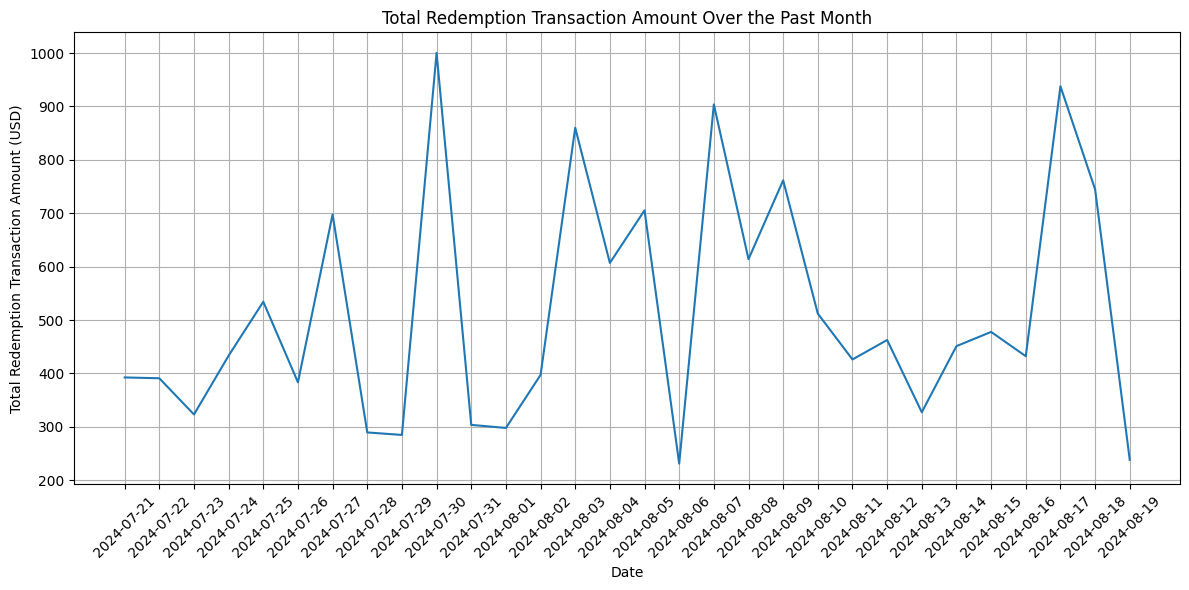

In [ ]:
# Based on df1, calculate total daily reemption based on the redemption_trans_amount and Visualize total redemption transaction amount over the past month as a line chart, with the data plotted by day

# Calculate total daily redemption
daily_redemption = df1.groupby('transaction_created_date')['redemption_trans_amount'].sum()

# Visualize total redemption transaction amount over the past month as a line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_redemption.index, daily_redemption.values)
plt.xlabel('Date')
plt.ylabel('Total Redemption Transaction Amount (USD)')
plt.title('Total Redemption Transaction Amount Over the Past Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##Maria's Redemption vs The Average Rdemption for All Venue

We want to see the position of average maria's redemption compared to overall redemption average.

In [ ]:
# First, we need to calculate the average for Marias and all venue
# Calculate average redemption for maria

# Filter data for Maria's Signature Suria KLCC
marias_data = df1[df1['venue'] == "Maria's Signature Suria KLCC"]

# Calculate average daily redemption for Maria's
average_daily_redemption_marias = marias_data.groupby('transaction_created_date')['redemption_trans_amount'].sum().mean()

print("Average daily redemption for Maria's Signature Suria KLCC: {:.2f} USD".format(average_daily_redemption_marias))


Average daily redemption for Maria's Signature Suria KLCC: 62.80 USD


In [ ]:
# Calculate the average redemption for all venue to compare with the redemption for maria's signature suria klcc

# Calculate average daily redemption for all venues
total_redemption_all_venues = df1['redemption_trans_amount'].sum()
num_days = len(df1['transaction_created_date'].unique())  # Assuming each date represents a unique day
average_daily_redemption_all_venues = total_redemption_all_venues / num_days

print("Average Daily Redemption (All Venues):", average_daily_redemption_all_venues)


Average Daily Redemption (All Venues): 514.09387


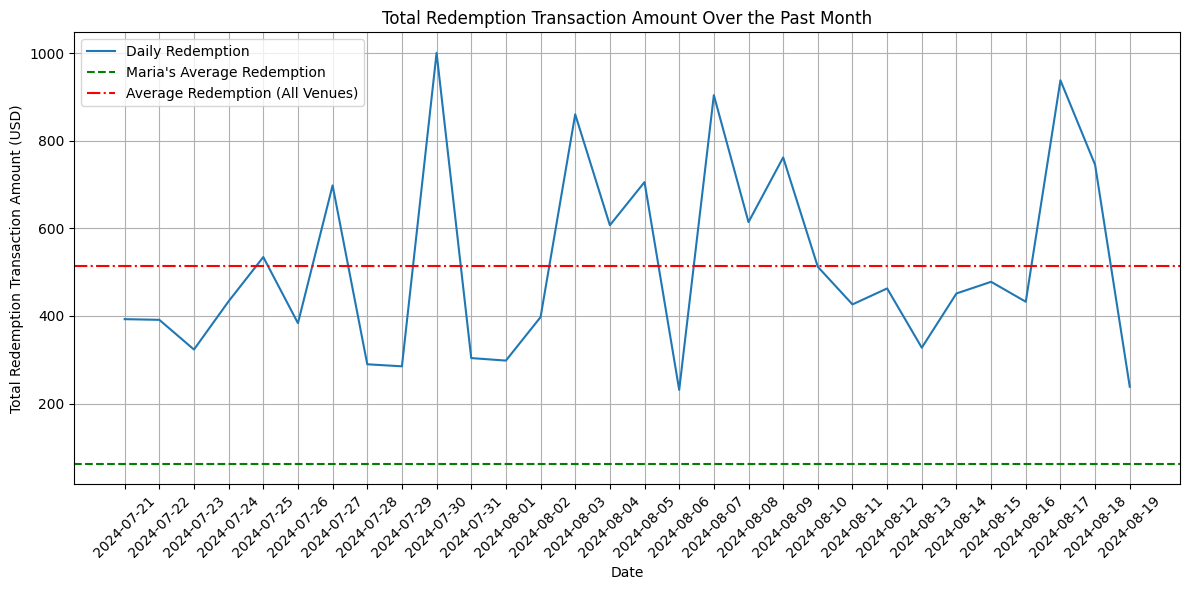

In [ ]:
# Visualize average redemption for all venue as line graph and average for maria's in line, and combine with the total daily redemption graph

# Calculate total daily redemption
daily_redemption = df1.groupby('transaction_created_date')['redemption_trans_amount'].sum()

# Visualize total redemption transaction amount over the past month as a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_redemption.index, daily_redemption.values, label='Daily Redemption')

# Add a horizontal line for Maria's average redemption
plt.axhline(y=average_daily_redemption_marias, color='green', linestyle='--', label="Maria's Average Redemption")

# Add a horizontal line for the average redemption of all venues
plt.axhline(y=average_daily_redemption_all_venues, color='red', linestyle='-.', label='Average Redemption (All Venues)')

plt.xlabel('Date')
plt.ylabel('Total Redemption Transaction Amount (USD)')
plt.title('Total Redemption Transaction Amount Over the Past Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##**Top 10 guests of Maria's Signature Suria KLCC**

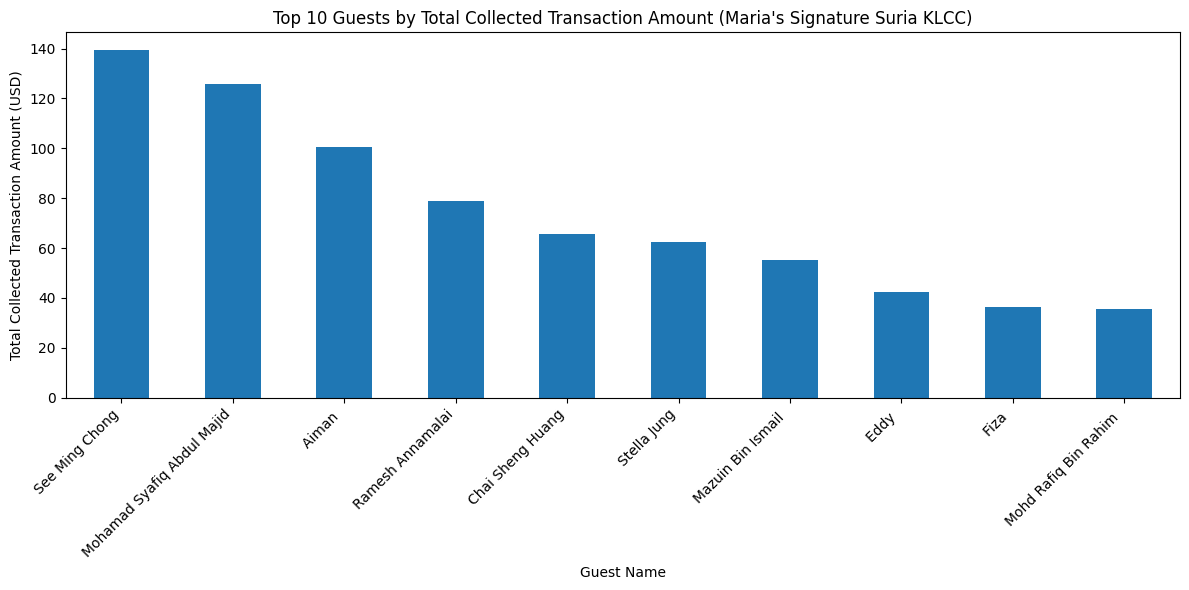

In [ ]:
# Calculate top 10 guest of Maria's Signature Suria KLCC based on collection_trans_amount and visualize  using barchart

# Filter data for Maria's Signature Suria KLCC
marias_data = df1[df1['venue'] == "Maria's Signature Suria KLCC"]

# Group by guest and sum their collection transaction amounts
top_guests = marias_data.groupby('guest_name')['collection_trans_amount'].sum().sort_values(ascending=False).head(10)

# Visualize top 10 guests by total collected transaction amount in a bar chart
plt.figure(figsize=(12, 6))
top_guests.plot(kind='bar')
plt.xlabel('Guest Name')
plt.ylabel('Total Collected Transaction Amount (USD)')
plt.title('Top 10 Guests by Total Collected Transaction Amount (Maria\'s Signature Suria KLCC)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Capture Rate

In [ ]:
#Remove % from column avg_capture_rate in df3
#we need to remove the '%' before visualizing a scatter plot because scatter plots require numbers to work correctly.
#The '%' symbol makes the data a text value (string), not a number.

# Remove % from 'avg_capture_rate' and convert to numeric
df3['avg_capture_rate'] = df3['avg_capture_rate'].str.rstrip('%').astype('float') / 100

# Display the modified DataFrame
df3.head()


,name,total_number_of_transaction,avg_capture_rate
0,Bottega @ KL,110,0.0450
1,Bottega @ Penang,7,0.0192
2,Maria's Signature Suria KLCC,563,0.3932
3,Maria's SteakCafe 1 POWERHOUSE,217,0.4961
4,Maria's SteakCafe Bangsar,196,0.5424


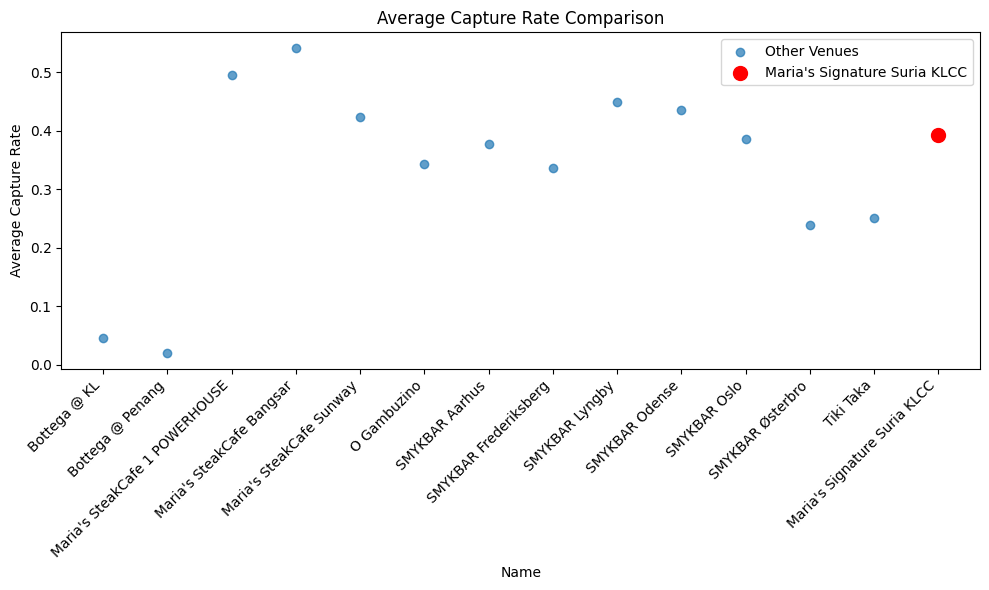

In [ ]:
# Using df3, create scatter plot to compare average capture return of maria's signature suria klcc with other venue. Highlighting the maria's signature suria klcc

# Calculate average capture rate for each venue
average_capture_rate = df3.groupby('name')['avg_capture_rate'].mean().reset_index()

# Separate Maria's Signature Suria KLCC from other venues
maria_capture_rate = average_capture_rate[average_capture_rate['name'] == "Maria's Signature Suria KLCC"]
other_venues_capture_rate = average_capture_rate[average_capture_rate['name'] != "Maria's Signature Suria KLCC"]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot other venues
plt.scatter(other_venues_capture_rate['name'], other_venues_capture_rate['avg_capture_rate'], label='Other Venues', alpha=0.7)

# Plot Maria's Signature Suria KLCC
plt.scatter(maria_capture_rate['name'], maria_capture_rate['avg_capture_rate'], color='red', label="Maria's Signature Suria KLCC", s=100)

plt.xlabel('Name')
plt.ylabel('Average Capture Rate')
plt.title('Average Capture Rate Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


## **Correlation between number of campaign and the averagre capture rate**

For this analysis, We will use Bottega Mediterranea and Maria Steakcafe because, based on the available data(df3), the partner of the venues are these two. They might have a substantial number of campaigns and capture rate data available, making the comparison statistically more meaningful.


In [ ]:
# Change column name from name to venue in df3
# In order to derive partner name from df1, the column name must be same. thus, we have to change the "name" to "venue"

df3.rename(columns={'name': 'venue'}, inplace=True)
df3.head()


,venue,total_number_of_transaction,avg_capture_rate
0,Bottega @ KL,110,0.0450
1,Bottega @ Penang,7,0.0192
2,Maria's Signature Suria KLCC,563,0.3932
3,Maria's SteakCafe 1 POWERHOUSE,217,0.4961
4,Maria's SteakCafe Bangsar,196,0.5424


In [ ]:
#Add an empty column in df3, fill in the column with the "partner", derived from df1

# Add an empty 'partner' column to df3
df3['partner'] = ''

# Create a dictionary mapping venues to partners from df1
venue_to_partner = dict(zip(df1['venue'], df1['partner']))

# Fill in the 'partner' column in df3 based on the venue
df3['partner'] = df3['venue'].map(venue_to_partner)

# Display the modified DataFrame
df3.head()


,venue,total_number_of_transaction,avg_capture_rate,partner
0,Bottega @ KL,110,0.0450,Bottega Mediterranea
1,Bottega @ Penang,7,0.0192,Bottega Mediterranea
2,Maria's Signature Suria KLCC,563,0.3932,Maria Steakcafe
3,Maria's SteakCafe 1 POWERHOUSE,217,0.4961,Maria Steakcafe
4,Maria's SteakCafe Bangsar,196,0.5424,Maria Steakcafe


In [ ]:
# Calculate number of campaign sent for Bottega Mediterranea and Maria Steakcafe per month


filtered_df2 = df2[df2['partner'].isin(['Bottega Mediterranea', 'Maria Steakcafe'])]

# Extract month from delivery_date
filtered_df2['month'] = pd.to_datetime(filtered_df2['delivery_date']).dt.to_period('M')

# Calculate number of campaigns sent per month
campaigns_per_month = filtered_df2.groupby(['partner', 'month'])['delivery_date'].count().reset_index()


print(campaigns_per_month)


                partner    month  delivery_date
0  Bottega Mediterranea  2024-08             66
1       Maria Steakcafe  2024-08           1229


<ipython-input-61-b971e96098a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['month'] = pd.to_datetime(filtered_df2['delivery_date']).dt.to_period('M')


In [ ]:
#Average capture rate for Bottega Mediterranea and Maria Steakcafe

# Filter df3 for Bottega Mediterranea and Maria Steakcafe
filtered_df3 = df3[df3['partner'].isin(['Bottega Mediterranea', 'Maria Steakcafe'])]

# Calculate average capture rate for each partner
average_capture_rate = filtered_df3.groupby('partner')['avg_capture_rate'].mean()

# Print the results
print(average_capture_rate)


partner
Bottega Mediterranea    0.0321
Maria Steakcafe         0.4640
Name: avg_capture_rate, dtype: float64


In [ ]:
# Correlation between number of campaigns and average capture rate

# Merge the two DataFrames on 'partner'
merged_df = pd.merge(campaigns_per_month, average_capture_rate, on='partner')

# Calculate the correlation coefficient
correlation = merged_df['delivery_date'].corr(merged_df['avg_capture_rate'])

print("Correlation between number of campaigns and average capture rate:", correlation)


Correlation between number of campaigns and average capture rate: 1.0




A correlation of 1.0 means there is a perfect positive linear relationship between the number of campaigns and the average capture rate.

This implies that as the number of campaigns increases, the average capture rate increases proportionally.

In simpler terms, more campaigns sent out directly translate to a higher capture rate.


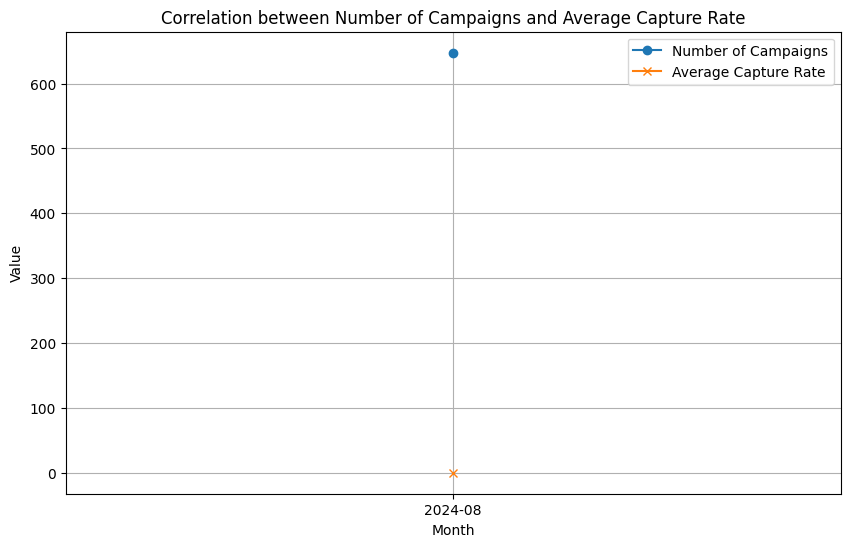

In [ ]:
# Visualize the correlation using line graph

# Group the merged DataFrame by 'month' and calculate the mean of 'delivery_date' and 'avg_capture_rate'
monthly_data = merged_df.groupby('month')[['delivery_date', 'avg_capture_rate']].mean().reset_index()

# Convert the 'month' column to string for plotting
monthly_data['month'] = monthly_data['month'].astype(str)

# Create a line graph to visualize the correlation
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['month'], monthly_data['delivery_date'], marker='o', label='Number of Campaigns')
plt.plot(monthly_data['month'], monthly_data['avg_capture_rate'], marker='x', label='Average Capture Rate')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Correlation between Number of Campaigns and Average Capture Rate')
plt.legend()
plt.grid(True)
plt.show()
